In [1]:
# Load data from MySQL to perform exploratory data analysis
import settings
import mysql.connector
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl


db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    passwd="gaurav",
    database="TwitterDB",
    charset = 'utf8'
)

Airbnb Negative Tweets Monitor: 
  2020-03-06 03:10:55  RT @JoshuaPotash: This is absolutely horrifying.

Rick Santelli on @CNBC says we should consider giving coronavirus to everybody to just ge
  2020-03-06 03:10:55  RT @OratorBlog: Chinese doctors coronavirus like a combo of SARS+AIDS can cause irreversible lung damage
The grim finding reported by Commu
  2020-03-06 03:10:55  RT @FuckYugi: Use Dirty Dueler to send the coronavirus to the shadow realm https://t.co/4TDLZOzDOX
  2020-03-06 03:10:55  RT @ztsamudzi: Im sorry Im irritated about this. Instead of wondering why Africans arent getting coronavirus and whether they might be i
  2020-03-06 03:10:57  How to boost sales of #airline tickets when people are afraid of #flying because of #coronavirus? Take the periods https://t.co/nKwX6OPooZ
  2020-03-06 03:10:57  RT @richeepeace: if this stupid coronavirus fks up my travel &amp; festival plans for THIS year i aint ever gonna forgive the universe
  2020-03-06 03:10:57  RT @JLaCocaina: 

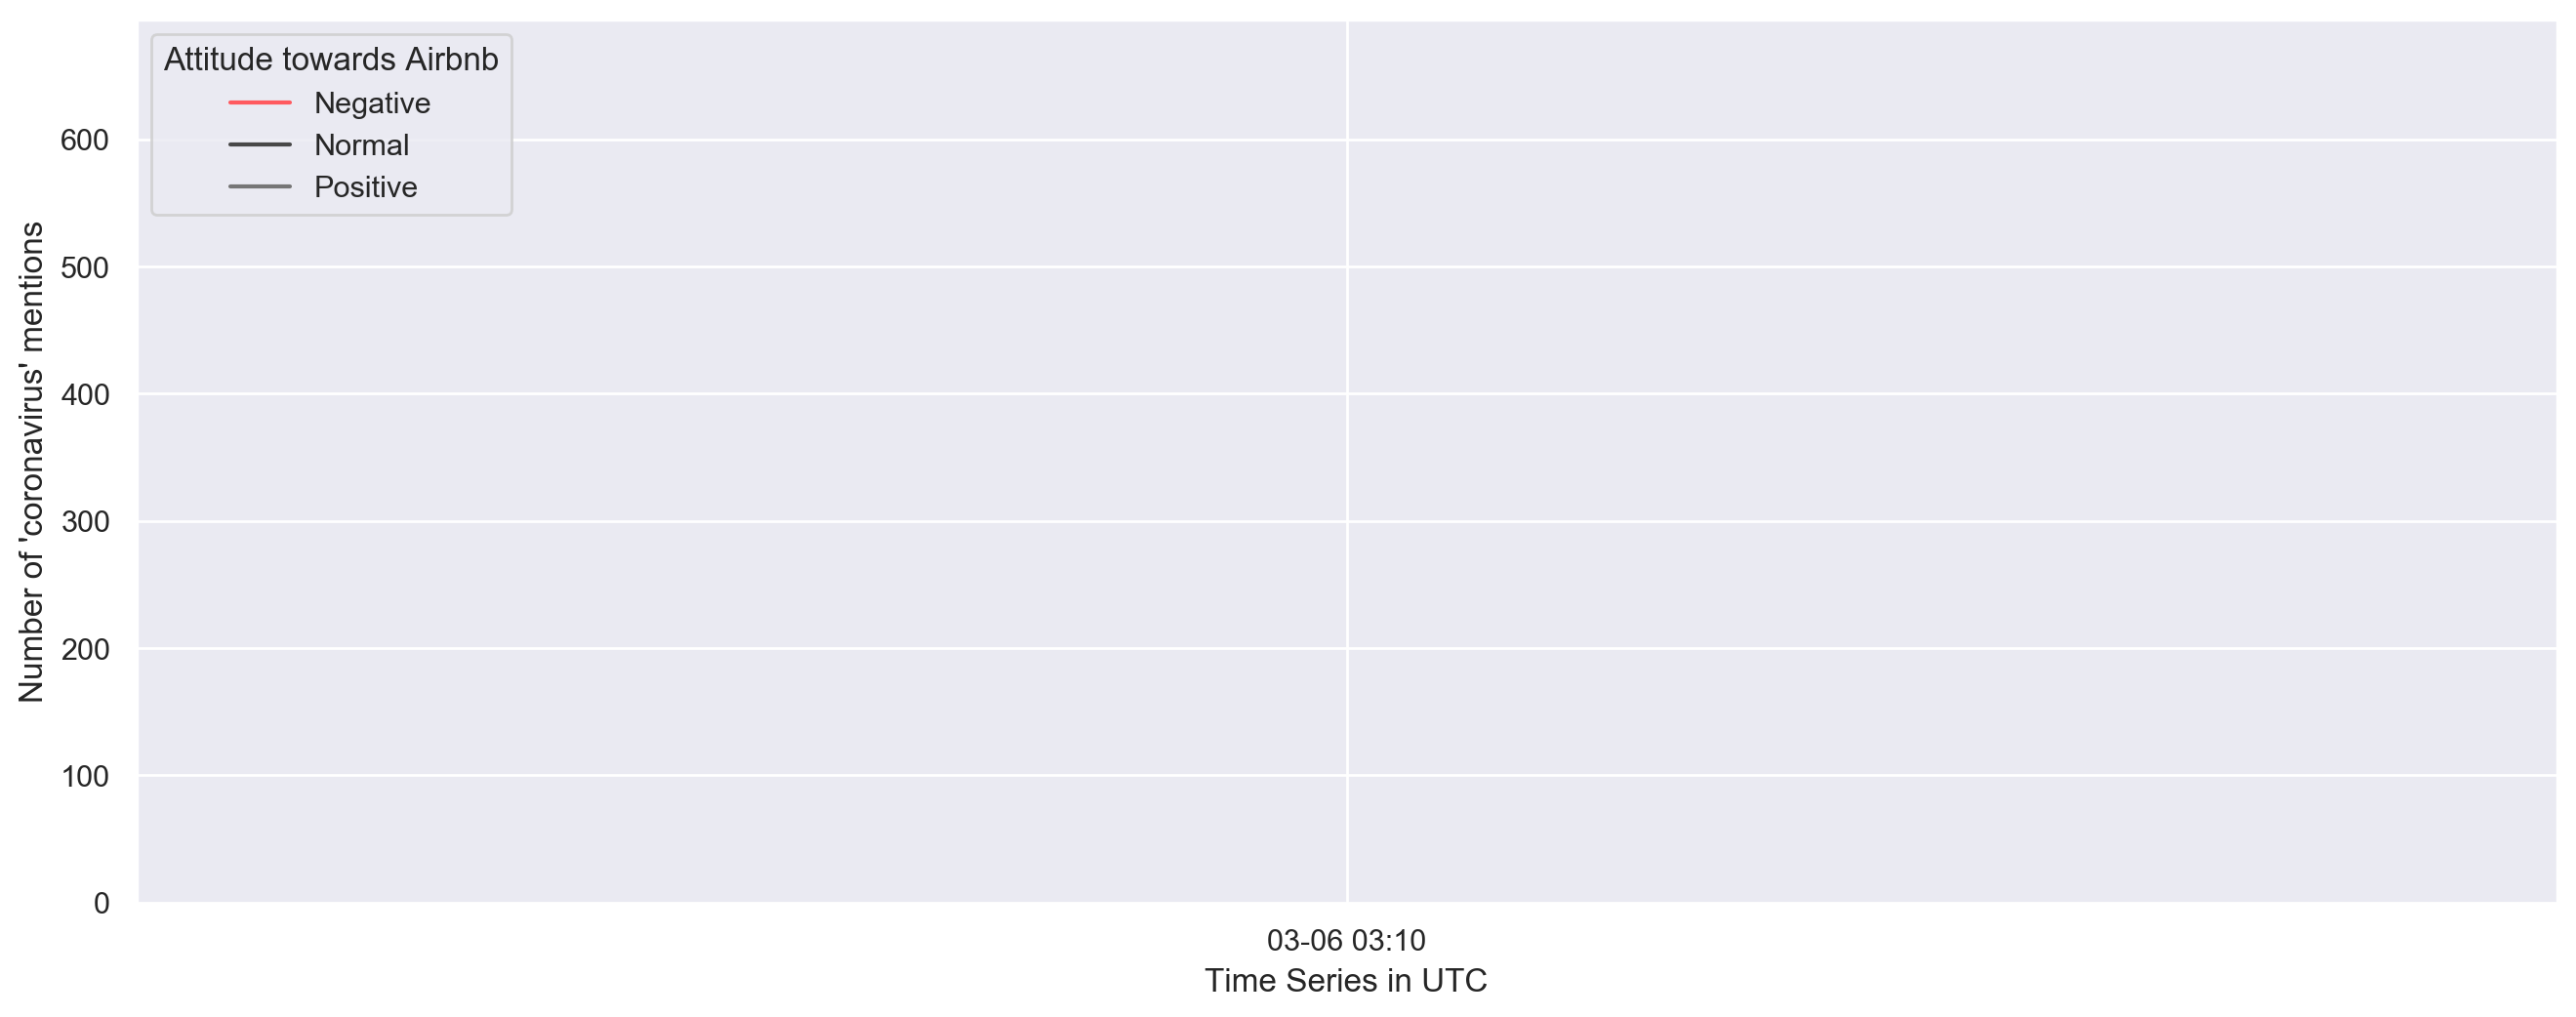

In [2]:
# Load data from MySQL
df = pd.read_sql('SELECT id_str, text, created_at, polarity, user_location FROM {}'.format(settings.TABLE_NAME), con=db_connection)
# UTC for date time at default
df['created_at'] = pd.to_datetime(df['created_at'])
print("Airbnb Negative Tweets Monitor: ")
for index, tweets in df[df['polarity'] == -1].iterrows():
    print("  " +str(tweets[2]) + "  " + tweets[1])


# Clean and transform data to enable time series
result = df.groupby([pd.Grouper(key='created_at', freq='10min'), 'polarity']).count() \
        .unstack(fill_value=0).stack().reset_index()
result['created_at'] = pd.to_datetime(result['created_at']).apply(lambda x: x.strftime('%m-%d %H:%M'))


# Plot Line Chart for monitoring brand awareness on Twitter
mpl.rcParams['figure.dpi']= 200
plt.figure(figsize=(16, 6))
sns.set(style="darkgrid")
ax = sns.lineplot(x = "created_at" ,y="id_str", hue='polarity', data=result,\
                  palette=sns.color_palette(["#FF5A5F","#484848", "#767676"]))
ax.set(xlabel='Time Series in UTC', ylabel="Number of '{}' mentions".format(settings.TRACK_WORDS[0]))
plt.legend(title='Attitude towards Airbnb', loc='upper left', labels=['Negative', 'Normal', 'Positive'])
sns.set(rc={"lines.linewidth": 1})
plt.show()

In [3]:
# Next step: find out geo-distribution of users
# Find where tweets come from according to their users' location
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="specify_your_app_name_here")
location = geolocator.geocode("Columbus, Oh")
print((location.latitude, location.longitude))
location.address

(39.9622601, -83.0007065)


'Columbus, Franklin County, Ohio, United States of America'